**Test search_by_geomery function for matedata service**

In [51]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import * 

In [52]:
metajson = "1538.geojson"
data = gpd.read_file(metajson)
data.set_index("UID",inplace=True,drop=False)

In [53]:
# input geometry from the google map interface
# http://gf2.ucs.indiana.edu/quaketables/uavsar?view=map
point_str = 'Point: (33.94697109585554, -118.07714843749999)'
rect_str = 'Rectangle: ((33.343343561567, -118.69238281249999), (34.34703015733175, -117.04443359374999))'
line_str = 'Line: ((34.72713264415401, -119.37353515624999),(33.67311969894201, -117.76953124999999),(33.983418330994276, -116.20947265624999),(32.4021911686893, -116.91259765624999))'
poly_str = 'Polygon: ((34.05626592724434, -117.59374999999999),(33.572488142047554, -118.38476562499999),(32.837100401791204, -117.25317382812499),(33.4809029903106, -116.73681640624999))'

# input sample from geogateway
#/geogateway_django_app/UAVSAR_geom/?type=point&queryStr=(32.65788,-115.48470)
#/geogateway_django_app/UAVSAR_geom/?type=rectangle&queryStr=((32.491,-117.300),(32.797,-116.883))
    

In [54]:
# shapely: Point, LineString, Polygon
# code converted from uavsarapi.py -- uavsar_query
def str2geometry(gstr):
    """convert a str input to geometry"""
    
    gtype,gcoord = gstr.split(":")
    gtype = gtype.strip()
    gcoord = eval(gcoord)
    if gtype == "Point":
        lat,lon = gcoord
        geom = Point(lon,lat)
    elif gtype == "Line":
        lonlat = [(x[1],x[0]) for x in gcoord]
        geom = LineString(lonlat)
    elif gtype == "Polygon":
        lonlat = [(x[1],x[0]) for x in gcoord]
        geom = Polygon(lonlat)
    elif gtype == "Rectangle":
        lat0,lon0 = gcoord[0]
        lat1,lon1 = gcoord[1]
        lonlat = [(lon0,lat1), (lon0,lat0), (lon1,lat0), (lon1,lat1)]
        geom = Polygon(lonlat)
    else:
        geom = None

    return geom
    

<AxesSubplot:>

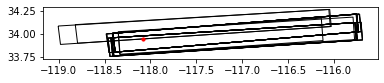

In [55]:
sel=data[data.intersects(str2geometry(point_str))]
base=sel.plot(facecolor="none", edgecolor="black")
s=gpd.GeoSeries(str2geometry(point_str))
s.plot(ax=base,color='red', markersize=10)

In [56]:
print("count: ",len(sel))

count:  32


<AxesSubplot:>

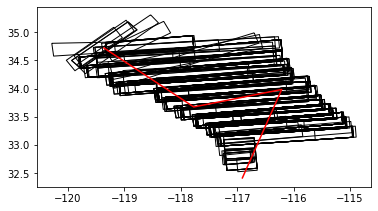

In [57]:
sel=data[data.intersects(str2geometry(line_str))]
base=sel.plot(facecolor="none", edgecolor="black")
s=gpd.GeoSeries(str2geometry(line_str))
s.plot(ax=base,color="red")        

In [58]:
print("count: ",len(sel))

count:  311


<AxesSubplot:>

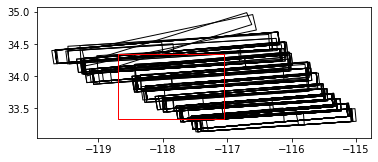

In [59]:
sel=data[data.intersects(str2geometry(rect_str))]
base=sel.plot(facecolor="none", edgecolor="black")
s = gpd.GeoSeries(str2geometry(rect_str))
s.plot(ax=base,facecolor="none", edgecolor="red")

In [60]:
print("count: ",len(sel))

count:  237


<AxesSubplot:>

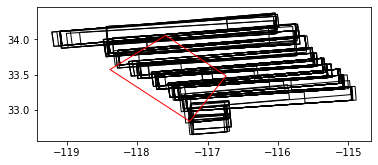

In [61]:
sel=data[data.intersects(str2geometry(poly_str))]
base = sel.plot(facecolor="none", edgecolor="black")
s = gpd.GeoSeries(str2geometry(poly_str))
s.plot(ax=base,facecolor="none", edgecolor="red")

In [62]:
print("count: ",len(sel))

count:  223


**search_by_eventdate**  
"Time1": "21-Jul-2009 17:37:31 UTC", "Time2": "28-Sep-2009 17:55:17 UTC"

In [63]:
data.dtypes

UID                  int64
Dataname            object
Description         object
Lines                int64
Samples              int64
StartLat           float64
StartLon           float64
LatSpace           float64
LonSpace           float64
Wavelength         float64
GPSAltitude        float64
TerrainHeight      float64
PegLat             float64
PegLon             float64
PegHead            float64
RadarDirection      object
Time1               object
Time2               object
PhaseSign          float64
Version              int64
URL                 object
geometry          geometry
dtype: object

In [64]:
#data["Time1"]=pd.to_datetime(data['Time1']).dt.tz_localize(None)

In [65]:
#data["Time2"]=pd.to_datetime(data['Time2']).dt.tz_localize(None)

In [66]:
#data.dtypes

In [67]:
import numpy as np

In [68]:
eventdate="2018-04-01"
testdate = np.datetime64(eventdate)
testdate

numpy.datetime64('2018-04-01')

In [69]:
#mask = (data['Time1']<testdate) & (data['Time2']>testdate)

In [70]:
#sel = data.loc[mask]

In [71]:
#sel

In [72]:
# a better version
tempdf = pd.DataFrame()
tempdf["Time1"]=pd.to_datetime(data['Time1']).dt.tz_localize(None)
tempdf["Time2"]=pd.to_datetime(data['Time2']).dt.tz_localize(None)

In [73]:
mask = (tempdf['Time1']<testdate) & (tempdf['Time2']>testdate)

In [74]:
sel = data.loc[mask]

In [75]:
sel

,UID,Dataname,Description,Lines,Samples,StartLat,StartLon,LatSpace,LonSpace,Wavelength,...,PegLat,PegLon,PegHead,RadarDirection,Time1,Time2,PhaseSign,Version,URL,geometry
UID,,,,,,,,,,,,,,,,,,,,,
1513,1513,SanAnd_08511_14145-012_18077-000_1469d_s01_L09...,"San Andreas Fault - Salton Trough, CA",5521,14424,33.360280,-115.732536,-0.000056,0.000056,23.840355,...,33.015536,-116.106733,85.689554,Left,9-Oct-2014 22:03:32 UTC,17-Oct-2018 21:38:48 UTC,-1.0,2,http://uavsar.jpl.nasa.gov/cgi-bin/product.pl?...,"POLYGON ((-115.73147 33.28401, -114.94603 33.3..."
1514,1514,SanAnd_08513_14081-004_18077-002_1589d_s01_L09...,"San Andreas Fault - Salton Trough, CA",5540,14438,33.523182,-115.872658,-0.000056,0.000056,23.840355,...,33.179017,-116.221856,85.693555,Left,11-Jun-2014 18:18:14 UTC,17-Oct-2018 22:35:45 UTC,-1.0,2,http://uavsar.jpl.nasa.gov/cgi-bin/product.pl?...,"POLYGON ((-115.87147 33.44591, -115.08544 33.4..."
1515,1515,SanAnd_26512_14081-003_18077-001_1589d_s01_L09...,"San Andreas Fault - Salton Trough, CA",7223,27689,33.385837,-117.374445,-0.000056,0.000056,23.840355,...,33.363475,-116.197764,-95.685938,Left,11-Jun-2014 17:52:58 UTC,17-Oct-2018 22:10:24 UTC,-1.0,2,http://uavsar.jpl.nasa.gov/cgi-bin/product.pl?...,"POLYGON ((-117.37643 33.22210, -115.86317 33.3..."
1516,1516,SanAnd_08511_14145-012_18077-000_1469d_s01_L09...,"San Andreas Fault - Salton Trough, CA",6818,31118,33.325055,-117.342276,-0.000056,0.000056,23.840355,...,33.015536,-116.106733,85.689554,Left,9-Oct-2014 21:59:26 UTC,17-Oct-2018 21:34:38 UTC,-1.0,2,http://uavsar.jpl.nasa.gov/cgi-bin/product.pl?...,"POLYGON ((-117.34174 33.17699, -115.63071 33.2..."
1517,1517,SanAnd_26512_14081-003_18077-001_1589d_s01_L09...,"San Andreas Fault - Salton Trough, CA",5964,15419,33.455843,-115.787207,-0.000056,0.000056,23.840355,...,33.363475,-116.197764,-95.685938,Left,11-Jun-2014 17:41:02 UTC,17-Oct-2018 21:58:44 UTC,-1.0,2,http://uavsar.jpl.nasa.gov/cgi-bin/product.pl?...,"POLYGON ((-115.79013 33.36287, -114.95423 33.4..."
1518,1518,SanAnd_08513_14081-004_18077-002_1589d_s01_L09...,"San Andreas Fault - Salton Trough, CA",6785,30281,33.484956,-117.483898,-0.000056,0.000056,23.840355,...,33.179017,-116.221856,85.693555,Left,11-Jun-2014 18:13:55 UTC,17-Oct-2018 22:31:16 UTC,-1.0,2,http://uavsar.jpl.nasa.gov/cgi-bin/product.pl?...,"POLYGON ((-117.48291 33.33906, -115.81863 33.4..."
1519,1519,SaltnS_22001_12024-013_18077-003_2357d_s01_L09...,"Salton Sea, CA",11448,11449,33.532460,-115.897104,-0.000056,0.000056,23.840355,...,33.276496,-115.728984,-140.148611,Left,4-May-2012 00:47:30 UTC,17-Oct-2018 22:53:21 UTC,-1.0,2,http://uavsar.jpl.nasa.gov/cgi-bin/product.pl?...,"POLYGON ((-115.43633 33.49299, -115.26273 33.3..."
1525,1525,SaltnS_22001_12024-013_18080-004_2376d_s01_L09...,"Salton Sea, CA",11450,11452,33.532238,-115.897438,-0.000056,0.000056,23.840355,...,33.275990,-115.729488,-140.149092,Left,4-May-2012 00:47:30 UTC,5-Nov-2018 19:31:51 UTC,-1.0,2,http://uavsar.jpl.nasa.gov/cgi-bin/product.pl?...,"POLYGON ((-115.43592 33.49344, -115.26349 33.3..."
1526,1526,SanAnd_26505_14081-005_18043-004_1524d_s01_L09...,"San Andreas Fault - Salton Trough, CA",6366,20564,33.113204,-116.085731,-0.000056,0.000056,23.840355,...,33.073473,-115.560974,-95.343277,Left,11-Jun-2014 18:36:14 UTC,13-Aug-2018 17:22:25 UTC,-1.0,2,http://uavsar.jpl.nasa.gov/cgi-bin/product.pl?...,"POLYGON ((-116.08591 32.98628, -114.96581 33.0..."
